# Analyze the latent constructs
For the thesis I definded the following 3 latent constructs to implement in the choice model:
- Natural hazard vulnerability
- Financialy vulnerability
- Psychological distance

The creation and description of these constructs is based on the following data analysis:

1. We analyze the correlation among all items, which are considered descriptors of on of the three latent constructs.
2. Using a scree plot and the Eigenvalues as well as the proportinal variance, the number of factors (latent constructs) is checked.
3. After a check of the number of influencing factors, an explanatory factor analysis (EFA) is done to define which items are best describing the different (three) latent constructs. 
4. And finally, I will do a latent profile analysis (LPA) with the remaining refined_items to define how many subgroups (values) I will define per latent construct.

In [67]:
# ------------------------------------------------------------------
# Load Libraries & Data
# ------------------------------------------------------------------
import os
print(os.getcwd())
import importlib

import re
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from factor_analyzer.factor_analyzer import calculate_kmo, calculate_bartlett_sphericity
from factor_analyzer import FactorAnalyzer

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams.update({
    'text.usetex': False,
    'font.family': 'serif',
    'font.serif': ['STIXGeneral'], # latex-style font
    'mathtext.fontset': 'stix',
        'axes.labelsize': 11,
    'axes.titlesize': 12,
    'font.size': 11,
    'legend.fontsize': 11,
    'xtick.labelsize': 11,
    'ytick.labelsize': 11
})

import f_statistics as stat
stat = importlib.reload(stat)
import f_data_processing as dp
import map_data as mp
mp = importlib.reload(mp)



c:\Users\stdt\ETH Zurich\PhD Veronika - 07_Master Thesis Natalie\10_hcm_code\natural_hazard_solidarity


In [91]:
# input clean dataframe with pre and post natural hazard survey data
df = pd.read_csv('../results/combined_surveys.csv', index_col=0)
# TODO: switch lreco_2 from S1 to costs_cc_policy_1 -> same quesiton at least in english pdf


### Correlation matrix
In a first step, all items to be investigated are defined.

Following that I calculate the pearson correlation of every item-combination and plot it in a matrix.

In [96]:
items = ['S1_psycho_distance_1', 'S1_psycho_distance_2', 'S1_psycho_distance_3', 'S1_psycho_distance_4', 
         'S1_finan_vulnerability_1',  'S0_costs_cc_policy_1', 'S0_income',
         'S0_experience_nh', 'S1_sensitivity_nh_1', 'S1_sensitivity_nh_2', 'S1_sensitivity_nh_3', 
         'S1_climatechange_nh_1', 'S1_climatechange_nh_2', 'S1_climatechange_nh_3']
for item in items:
    print(item, ' - max: ', max(df[item].dropna()), ', min: ', min(df[item].dropna()))
print(len(df))
X = df[items].dropna() # TODO: fix with filling up as veronika did -> maybe better in data processing
len(X)

S1_psycho_distance_1  - max:  6.0 , min:  1.0
S1_psycho_distance_2  - max:  6.0 , min:  1.0
S1_psycho_distance_3  - max:  6.0 , min:  1.0
S1_psycho_distance_4  - max:  6.0 , min:  1.0
S1_finan_vulnerability_1  - max:  6.0 , min:  1.0
S0_costs_cc_policy_1  - max:  6.0 , min:  1.0
S0_income  - max:  3.0 , min:  1.0
S0_experience_nh  - max:  1.0 , min:  0.0
S1_sensitivity_nh_1  - max:  6.0 , min:  1.0
S1_sensitivity_nh_2  - max:  6.0 , min:  1.0
S1_sensitivity_nh_3  - max:  6.0 , min:  1.0
S1_climatechange_nh_1  - max:  6.0 , min:  1.0
S1_climatechange_nh_2  - max:  6.0 , min:  1.0
S1_climatechange_nh_3  - max:  6.0 , min:  1.0
503


330

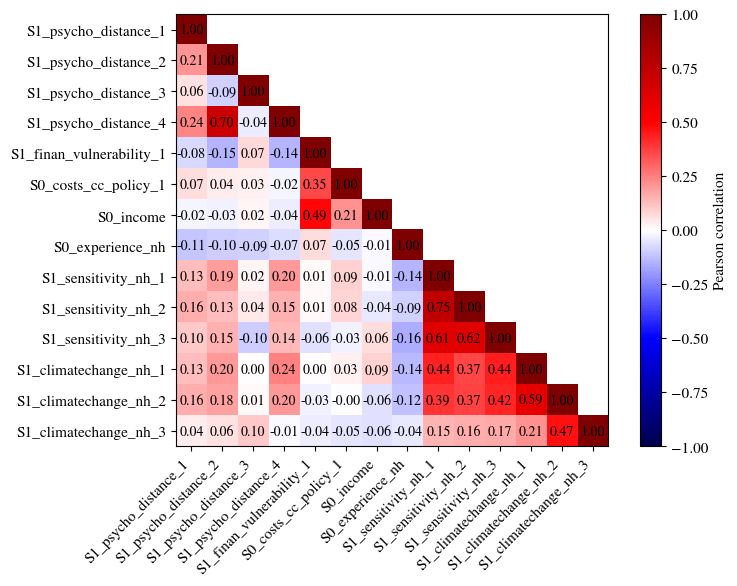

,S1_psycho_distance_1,S1_psycho_distance_2,S1_psycho_distance_3,S1_psycho_distance_4,S1_finan_vulnerability_1,S0_costs_cc_policy_1,S0_income,S0_experience_nh,S1_sensitivity_nh_1,S1_sensitivity_nh_2,S1_sensitivity_nh_3,S1_climatechange_nh_1,S1_climatechange_nh_2,S1_climatechange_nh_3
5,4.0,1.0,4.0,1.0,4.0,5.0,3.0,0.0,3.0,1.0,4.0,3.0,4.0,6.0
6,3.0,1.0,6.0,1.0,2.0,1.0,2.0,1.0,3.0,4.0,3.0,1.0,3.0,6.0
8,3.0,1.0,6.0,1.0,2.0,3.0,2.0,1.0,2.0,2.0,2.0,2.0,6.0,6.0
9,3.0,1.0,4.0,1.0,4.0,5.0,3.0,1.0,3.0,5.0,2.0,1.0,1.0,6.0
10,6.0,1.0,3.0,1.0,6.0,6.0,2.0,1.0,3.0,3.0,3.0,4.0,4.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,4.0,1.0,4.0,1.0,3.0,6.0,3.0,1.0,1.0,3.0,4.0,1.0,3.0,5.0
499,3.0,1.0,3.0,1.0,3.0,5.0,2.0,1.0,4.0,5.0,5.0,5.0,5.0,6.0
500,3.0,1.0,6.0,1.0,4.0,4.0,2.0,1.0,3.0,3.0,3.0,2.0,4.0,6.0
501,6.0,6.0,5.0,6.0,1.0,6.0,3.0,0.0,6.0,5.0,5.0,5.0,5.0,6.0


In [ ]:


# correlation default: pearson
R = X.corr()
vals = R.values.copy()

# correlation matrix with corr-values
mask = np.triu(np.ones_like(vals,dtype=bool), k=1)
vals_masked = np.ma.array(vals, mask=mask)
fig, ax = plt.subplots(figsize=(8, 6))

cmapname = 'PRGn'
cmapname = 'seismic'
# cmapname = 'purple_white_green'

im = ax.imshow(vals_masked, vmin=-1, vmax=1, cmap=mp.COLOR_MAP[cmapname])
for i in range(R.shape[0]):
    for j in range(R.shape[1]):
        if not mask[i,j]:
            ax.text(j, i, f'{R.values[i, j]:.2f}', ha='center', va='center', fontsize=10)

# axis labels and colorbar
cbar = fig.colorbar(im, ax=ax)
cbar.set_label('Pearson correlation')
ax.set_xticks(np.arange(R.shape[1]))
ax.set_yticks(np.arange(R.shape[0]))
ax.set_xticklabels(R.columns, rotation=45, ha='right')
ax.set_yticklabels(R.index)

plt.tight_layout()
plt.savefig(f'../results/Correlation-matrix-{cmapname}.png', dpi=600)
plt.show()
X



### Eigenvalues, scree plot and proportional variance
In my theory part, I defined 3 latent constructs: psychological distance, financial vulnerability, and natural hazard vulnerability, for which I selected fitting survey items that might be able to describe those. After having a look at the correlation matrix it becomes visible, that for example natural hazard experience does not correlate with any of the other items or event negatively correlates, which is why for further analysis, I will exclude it. 

To continue with a bit more data driven method, I will first analyze the number of potential distinct latent constructs using a scree plot and an eigenvalue analysis counting eigenvalues > 1.
(see also __[EFA Determining the Number of Factors](https://usq.pressbooks.pub/statisticsforresearchstudents/chapter/efa-assumptions/)__)

In [80]:
refined_items = ['S1_psycho_distance_1', 'S1_psycho_distance_2', 'S1_psycho_distance_3', 'S1_psycho_distance_4', 
         'S1_finan_vulnerability_1', 
         #'S0_costs_cc_policy_1', 
         #'S0_income',
         'S1_sensitivity_nh_1', 'S1_sensitivity_nh_2', 'S1_sensitivity_nh_3', 
         'S1_climatechange_nh_1', 'S1_climatechange_nh_2', 'S1_climatechange_nh_3']

In [81]:
X = df[refined_items].dropna() # TODO: make sure not too many are na


# correlation default: pearson
R = X.corr()

# Eigenvalues (symmetrc Matrix -> eigh is stable)
eigvals, eigvecs = np.linalg.eigh(R.values)

# sort descending
eigvals = eigvals[::-1]

# print('Eigenvalues:', np.round(eigvals, 3))
# print('Summe (sollte = #Items sein):', eigvals.sum())
X

,S1_psycho_distance_1,S1_psycho_distance_2,S1_psycho_distance_3,S1_psycho_distance_4,S1_finan_vulnerability_1,S1_sensitivity_nh_1,S1_sensitivity_nh_2,S1_sensitivity_nh_3,S1_climatechange_nh_1,S1_climatechange_nh_2,S1_climatechange_nh_3
5,4.0,1.0,4.0,1.0,4.0,3.0,1.0,4.0,3.0,4.0,6.0
6,3.0,1.0,6.0,1.0,2.0,3.0,4.0,3.0,1.0,3.0,6.0
8,3.0,1.0,6.0,1.0,2.0,2.0,2.0,2.0,2.0,6.0,6.0
9,3.0,1.0,4.0,1.0,4.0,3.0,5.0,2.0,1.0,1.0,6.0
10,6.0,1.0,3.0,1.0,6.0,3.0,3.0,3.0,4.0,4.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...
498,4.0,1.0,4.0,1.0,3.0,1.0,3.0,4.0,1.0,3.0,5.0
499,3.0,1.0,3.0,1.0,3.0,4.0,5.0,5.0,5.0,5.0,6.0
500,3.0,1.0,6.0,1.0,4.0,3.0,3.0,3.0,2.0,4.0,6.0
501,6.0,6.0,5.0,6.0,1.0,6.0,5.0,5.0,5.0,5.0,6.0


#### Determining the number of distinct latent constructs
In my theory part, I defined 3 latent constructs: psychological distance, financial vulnerability, and natural hazard vulnerability, for which I selected fitting survey items that might be able to describe those.

To continue with a bit more data driven method, I will first analyze the number of potential distinct latent constructs using a scree plot and an eigenvalue analysis counting eigenvalues > 1.
(see also __[EFA Determining the Number of Factors](https://usq.pressbooks.pub/statisticsforresearchstudents/chapter/efa-assumptions/)__)

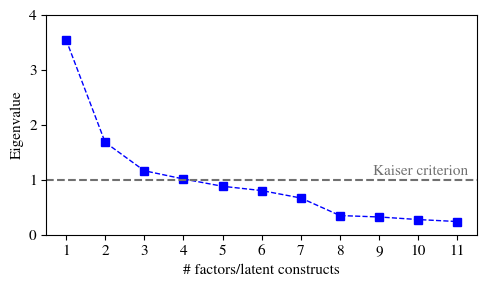

    component  eigenvalue  prop_var   cum_var
0           1    3.556972  0.323361  0.323361
1           2    1.686160  0.153287  0.476648
2           3    1.168775  0.106252  0.582901
3           4    1.018739  0.092613  0.675513
4           5    0.885755  0.080523  0.756036
5           6    0.807402  0.073400  0.829437
6           7    0.672316  0.061120  0.890556
7           8    0.352912  0.032083  0.922639
8           9    0.327146  0.029741  0.952380
9          10    0.279957  0.025451  0.977830
10         11    0.243866  0.022170  1.000000


In [82]:
# Scree plot
x = np.arange(1, len(eigvals) + 1)

plt.figure(figsize=(5,3))
plt.plot(x, eigvals, marker='s', linestyle='--', linewidth=1, color='blue')
plt.xticks(x)
plt.axhline(1, linestyle='--', color='#707070')  # Kaiser-criteria (optional), often too loose
ax = plt.gca()
ax.text(0.98, 1.15, 'Kaiser criterion', transform=ax.get_yaxis_transform(), color='#707070', va='center', ha='right')
plt.xlabel('# factors/latent constructs')
plt.ylim(0,4)
plt.ylabel('Eigenvalue')
plt.tight_layout()
plt.savefig(f'../results/Scree-plot.png', dpi=600)
plt.show()

# % of variance explained by eigenvalues
explained = eigvals / eigvals.sum()
cum_explained = np.cumsum(explained)

out = pd.DataFrame({
    'component': x,
    'eigenvalue': eigvals,
    'prop_var': explained,
    'cum_var': cum_explained
})
print(out)

As we can see in the Scree plot as well as the the cummulated proportional variabilities associated to one of the factors in the room, it does make sense to assume having 2-4 latent factors, which is why the next steps is finding out what number of factors would make sense in theory, not just looking at the data.

In [83]:
# prepare the latent construct variables
print(pd.unique(df['S0_income']))

factors = {
    2: ['Factor 1', 'Factor 2'],
    3: ['Factor 1', 'Factor 2', 'Factor 3'],
    4: ['Factor 1', 'Factor 2', 'Factor 3', 'Factor 4']
}

num_factors = 4 # TODO change between 2-4
factors[num_factors]

[nan  3.  2.  1.]


['Factor 1', 'Factor 2', 'Factor 3', 'Factor 4']

KMO (model): 0.7500189991306019
Bartlett chi2: 1438.3980623888012 p: 1.1463587354813227e-264
Eigenvalues: [3.55697194 1.68616037 1.16877532 1.01873917 0.88575453 0.8074017
 0.6723156  0.35291236 0.32714592 0.27995725 0.24386583]
          Factor 1  Factor 2  Factor 3  Factor 4
Factor 1  1.000000  0.228909  0.003879  0.383634
Factor 2  0.228909  1.000000  0.267569  0.575326
Factor 3  0.003879  0.267569  1.000000  0.304043
Factor 4  0.383634  0.575326  0.304043  1.000000


c:\Users\stdt\ETH Zurich\PhD Veronika - 07_Master Thesis Natalie\10_hcm_code\.venv\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


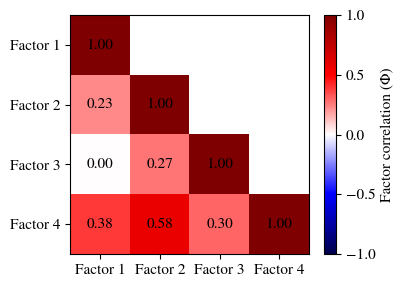

In [84]:
X = df[refined_items].copy()

# Missing handling (simpel)
X = X.dropna()

Z = StandardScaler().fit_transform(X)
Z = pd.DataFrame(Z, columns=refined_items, index=X.index)

# EFA diagnostics KMO and Bartlett
kmo_all, kmo_model = calculate_kmo(Z)
chi2, p = calculate_bartlett_sphericity(Z)

print('KMO (model):', kmo_model)
print('Bartlett chi2:', chi2, 'p:', p)

# check factor number
corr = Z.corr().values
eigvals = np.linalg.eigvals(corr)
print('Eigenvalues:', np.sort(eigvals)[::-1])

# fit EFA
fa = FactorAnalyzer(n_factors=num_factors, rotation='oblimin', method='ml')  # None bc only one factor, 'ml' or 'principal'
fa.fit(Z)

loadings = pd.DataFrame(fa.loadings_, index=refined_items, columns=factors[num_factors])

phi = getattr(fa, 'phi_', None)
phi_df = pd.DataFrame(phi, index=loadings.columns, columns=loadings.columns)

communalities = pd.Series(fa.get_communalities(), index=refined_items, name='h2')
uniqueness = pd.Series(fa.get_uniquenesses(), index=refined_items, name='u2')

# print('Loading\n', loadings)
# print('Communalities\n', communalities)
# print('Uniqueness\n', uniqueness)
print(phi_df)
from matplotlib.colors import TwoSlopeNorm
mask = np.triu(np.ones_like(phi_df.values,dtype=bool), k=1)
vals_masked = np.ma.array(phi_df.values, mask=mask)

cmapname = 'seismic'
fig, ax = plt.subplots(figsize=(4, 3))
norm = TwoSlopeNorm(vmin=-1, vcenter=0, vmax=1)

im = ax.imshow(vals_masked, vmin=-1, vmax=1, cmap=mp.COLOR_MAP[cmapname])
ax.set_xticks(range(phi_df.shape[1]))
ax.set_yticks(range(phi_df.shape[0]))
ax.set_xticklabels(phi_df.columns)
ax.set_yticklabels(phi_df.index)

for i in range(phi_df.shape[0]):
    for j in range(phi_df.shape[1]):
        if not mask[i,j]:
            ax.text(j, i, f'{phi_df.iat[i,j]:.2f}', ha='center', va='center')

plt.colorbar(im, ax=ax, label='Factor correlation (Φ)')
plt.tight_layout()
plt.savefig(f'../results/Factor-correlation-of-{num_factors}-factors.png', dpi=600)


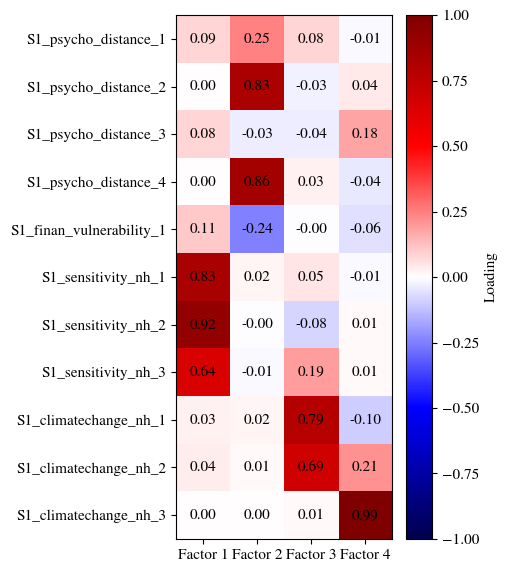

In [85]:
fig, ax = plt.subplots(figsize=(5, 0.35*len(loadings)+2))
cmapname = 'seismic'
im = ax.imshow(loadings.values, aspect='auto', cmap=mpl.colormaps[cmapname], vmin=-1, vmax=1)

ax.set_xticks(range(loadings.shape[1]))
ax.set_xticklabels(loadings.columns)
ax.set_yticks(range(loadings.shape[0]))
ax.set_yticklabels(loadings.index)

for i in range(loadings.shape[0]):
    for j in range(loadings.shape[1]):
        ax.text(j, i, f'{loadings.iat[i,j]:.2f}', ha='center', va='center')

plt.colorbar(im, ax=ax, label='Loading')
plt.tight_layout()
plt.savefig(f'../results/EFA-with-{num_factors}-factors.png', dpi=600)
plt.show()


### Psychological distance

In [ ]:
construct = 'Psychological distance'
cols = ['S1_psycho_distance_1', 'S1_psycho_distance_2', 'S1_psycho_distance_3', 'S1_psycho_distance_4'] # 2, 2, 2, 2
X = df[cols].copy()

# Missing handling (simpel)
X = X.dropna()

Z = StandardScaler().fit_transform(X)
Z = pd.DataFrame(Z, columns=cols, index=X.index)

# EFA diagnostics KMO and Bartlett
kmo_all, kmo_model = calculate_kmo(Z)
chi2, p = calculate_bartlett_sphericity(Z)

print('KMO (model):', kmo_model)
print('Bartlett chi2:', chi2, 'p:', p)

# check factor number
corr = Z.corr().values
eigvals = np.linalg.eigvals(corr)
print('Eigenvalues:', np.sort(eigvals)[::-1])

# fit EFA
fa = FactorAnalyzer(n_factors=1, rotation=None, method='ml')  # None bc only one factor, 'ml' or 'principal'
fa.fit(Z)

loadings = pd.DataFrame(fa.loadings_, index=cols, columns=[''])
phi = pd.DataFrame(fa.phi_, index=loadings.columns, columns=loadings.columns)

communalities = pd.Series(fa.get_communalities(), index=cols, name='h2')
uniqueness = pd.Series(fa.get_uniquenesses(), index=cols, name='u2')

print(loadings)
print(communalities)
print(uniqueness)

KMO (model): 0.5507178412777982
Bartlett chi2: 335.9853559395072 p: 1.5719109710321683e-69
Eigenvalues: [1.86146192 1.06400957 0.79030695 0.28422155]
                              
S1_psycho_distance_1 -0.298920
S1_psycho_distance_2 -0.798589
S1_psycho_distance_3  0.011369
S1_psycho_distance_4 -0.892928
S1_psycho_distance_1    0.089353
S1_psycho_distance_2    0.637744
S1_psycho_distance_3    0.000129
S1_psycho_distance_4    0.797320
Name: h2, dtype: float64
S1_psycho_distance_1    0.910647
S1_psycho_distance_2    0.362256
S1_psycho_distance_3    0.999871
S1_psycho_distance_4    0.202680
Name: u2, dtype: float64


c:\Users\stdt\ETH Zurich\PhD Veronika - 07_Master Thesis Natalie\10_hcm_code\.venv\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


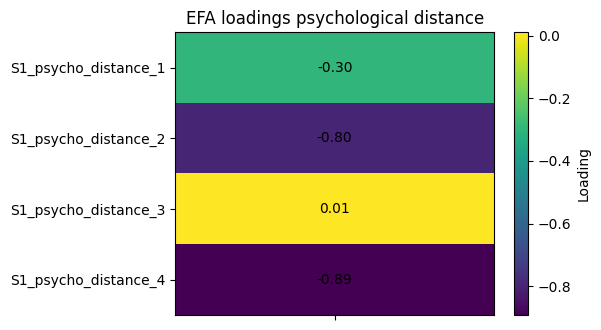

In [ ]:
fig, ax = plt.subplots(figsize=(6, 0.35*len(loadings)+2))
im = ax.imshow(loadings.values, aspect='auto')

ax.set_xticks(range(loadings.shape[1]))
ax.set_xticklabels(loadings.columns)
ax.set_yticks(range(loadings.shape[0]))
ax.set_yticklabels(loadings.index)

for i in range(loadings.shape[0]):
    for j in range(loadings.shape[1]):
        ax.text(j, i, f'{loadings.iat[i,j]:.2f}', ha='center', va='center')

plt.colorbar(im, ax=ax, label='Loading')
ax.set_title('EFA loadings psychological distance')
plt.tight_layout()
plt.show()


### Financial vulnerability

In [ ]:
construct = 'Financial vulnerability'
cols = ['S0_income', 'S1_finan_vulnerability_1', 'S0_costs_cc_policy_1'] # y, y, 1 S0_costs_cc_policy_1 = S1_lreco_2
X = df[cols].copy()

# # Einkommen oft schief → log-Transform (robust)
# X['income_pc'] = np.log1p(X['income_pc'])

# Missing handling (simpel)
X = X.dropna()

Z = StandardScaler().fit_transform(X)
Z = pd.DataFrame(Z, columns=cols, index=X.index)

# EFA diagnostics KMO and Bartlett
kmo_all, kmo_model = calculate_kmo(Z)
chi2, p = calculate_bartlett_sphericity(Z)

print('KMO (model):', kmo_model)
print('Bartlett chi2:', chi2, 'p:', p)

# check factor number
corr = Z.corr().values
eigvals = np.linalg.eigvals(corr)
print('Eigenvalues:', np.sort(eigvals)[::-1])

# fit EFA
fa = FactorAnalyzer(n_factors=1, rotation=None, method='ml')  # None bc only one factor, 'ml' or 'principal'
fa.fit(Z)

loadings = pd.DataFrame(fa.loadings_, index=cols, columns=[''])
phi = pd.DataFrame(fa.phi_, index=loadings.columns, columns=loadings.columns)

communalities = pd.Series(fa.get_communalities(), index=cols, name='h2')
uniqueness = pd.Series(fa.get_uniquenesses(), index=cols, name='u2')

print(loadings)
print(communalities)
print(uniqueness)

1.0
KMO (model): 0.5840671795902306
Bartlett chi2: 143.59106393914055 p: 6.354683904858325e-31
Eigenvalues: [1.67873317 0.81980436 0.50146247]
                                  
S0_income                -0.612265
S1_finan_vulnerability_1 -0.804065
S0_costs_cc_policy_1     -0.354676
S0_income                   0.374869
S1_finan_vulnerability_1    0.646521
S0_costs_cc_policy_1        0.125795
Name: h2, dtype: float64
S0_income                   0.625131
S1_finan_vulnerability_1    0.353479
S0_costs_cc_policy_1        0.874205
Name: u2, dtype: float64


c:\Users\stdt\ETH Zurich\PhD Veronika - 07_Master Thesis Natalie\10_hcm_code\.venv\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


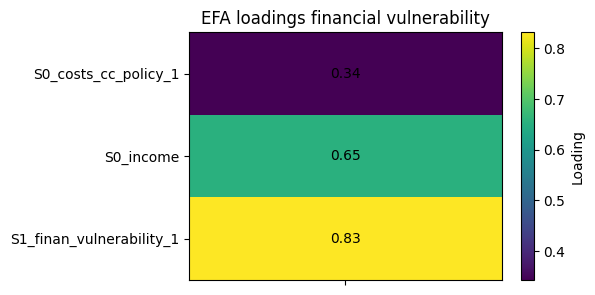

In [ ]:
fig, ax = plt.subplots(figsize=(6, 0.35*len(loadings)+2))
im = ax.imshow(loadings.values, aspect='auto')

ax.set_xticks(range(loadings.shape[1]))
ax.set_xticklabels(loadings.columns)
ax.set_yticks(range(loadings.shape[0]))
ax.set_yticklabels(loadings.index)

for i in range(loadings.shape[0]):
    for j in range(loadings.shape[1]):
        ax.text(j, i, f'{loadings.iat[i,j]:.2f}', ha='center', va='center')

plt.colorbar(im, ax=ax, label='Loading')
ax.set_title('EFA loadings financial vulnerability')
plt.tight_layout()
plt.show()



### Natural hazard vulnerability

In [ ]:
construct = 'Natural hazard vulnerability'
cols = ['S0_experience_nh', 'S1_sensitivity_nh_1', 'S1_sensitivity_nh_2', 'S1_sensitivity_nh_3', 'S1_climatechange_nh_1']# 1, y, y, y, y
X = df[cols].copy()
print(X)

# Missing handling (simpel)
X = X.dropna()

Z = StandardScaler().fit_transform(X)
Z = pd.DataFrame(Z, columns=cols, index=X.index)

# EFA diagnostics KMO and Bartlett
kmo_all, kmo_model = calculate_kmo(Z)
chi2, p = calculate_bartlett_sphericity(Z)

print('KMO (model):', kmo_model)
print('Bartlett chi2:', chi2, 'p:', p)

# check factor number
corr = Z.corr().values
eigvals = np.linalg.eigvals(corr)
print('Eigenvalues:', np.sort(eigvals)[::-1])

# fit EFA
fa = FactorAnalyzer(n_factors=1, rotation=None, method='ml')  # None bc only one factor, 'ml' or 'principal'
fa.fit(Z)

loadings = pd.DataFrame(fa.loadings_, index=cols, columns=[''])
phi = pd.DataFrame(fa.phi_, index=loadings.columns, columns=loadings.columns)

communalities = pd.Series(fa.get_communalities(), index=cols, name='h2')
uniqueness = pd.Series(fa.get_uniquenesses(), index=cols, name='u2')

print(loadings)
print(communalities)
print(uniqueness)

     S0_experience_nh  S1_sensitivity_nh_1  S1_sensitivity_nh_2  \
0                 0.0                  3.0                  3.0   
1                 1.0                  5.0                  5.0   
2                 1.0                  2.0                  2.0   
3                 1.0                  1.0                  2.0   
4                 0.0                  5.0                  5.0   
..                ...                  ...                  ...   
498               1.0                  1.0                  3.0   
499               1.0                  4.0                  5.0   
500               1.0                  3.0                  3.0   
501               0.0                  6.0                  5.0   
502               1.0                  6.0                  6.0   

     S1_sensitivity_nh_3  S1_climatechange_nh_1  
0                    3.0                    3.0  
1                    4.0                    1.0  
2                    2.0                    4

c:\Users\stdt\ETH Zurich\PhD Veronika - 07_Master Thesis Natalie\10_hcm_code\.venv\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


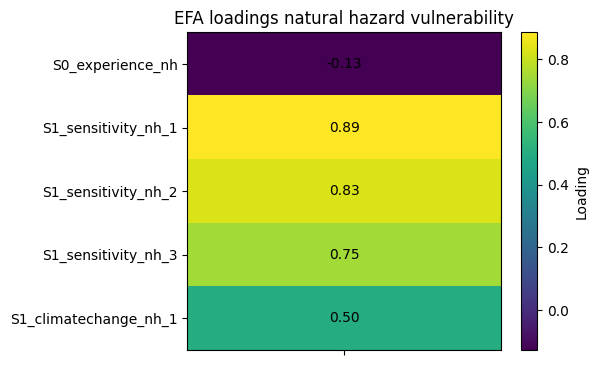

In [ ]:
fig, ax = plt.subplots(figsize=(6, 0.35*len(loadings)+2))
im = ax.imshow(loadings.values, aspect='auto')

ax.set_xticks(range(loadings.shape[1]))
ax.set_xticklabels(loadings.columns)
ax.set_yticks(range(loadings.shape[0]))
ax.set_yticklabels(loadings.index)

for i in range(loadings.shape[0]):
    for j in range(loadings.shape[1]):
        ax.text(j, i, f'{loadings.iat[i,j]:.2f}', ha='center', va='center')

plt.colorbar(im, ax=ax, label='Loading')
ax.set_title('EFA loadings natural hazard vulnerability')
plt.tight_layout()
plt.show()
